### Student Information
Name:   邱聖堯

Student ID: 114061582

GitHub ID: 224604594

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

_**Preperation : loading data and show the current state of my dataframe**_

In [2]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk

df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
print(df[0:10])

      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   
5  comment   2025-04-12 2:19:03  mmo4k9g    wallstreetbets   
6  comment  2025-04-11 12:37:23  mmjx7vz            stocks   
7  comment  2025-04-11 17:28:50  mmlhxwc    wallstreetbets   
8  comment  2021-02-01 15:36:32  gllyi5z            stocks   
9  comment  2021-12-31 16:29:49  hqp3kt4  stockstobuytoday   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3    

_**Checking for the dimension of data and each column title**_

In [34]:
print("The title of the column is :\t", df.columns.values)
print()
print("The shape of the data is :\t", df.shape)

The title of the column is :	 ['type' 'datetime' 'post_id' 'subreddit' 'title' 'author' 'url' 'upvotes'
 'downvotes' 'upvote_ratio' 'text' 'subjectivity' 'polarity' 'sentiment'
 'entities' 'label']

The shape of the data is :	 (847, 16)


_**Making the statics of my dataframe**_

In [44]:
for x in df.columns:
    print(f"The count value in each column {x:<12} is :\t{df[x].count()}")
print("="*75)
for x in df.columns:
    print(f"The number of unique value in each column {x:<12} is :\t{df[x].nunique()}")

The count value in each column type         is :	847
The count value in each column datetime     is :	847
The count value in each column post_id      is :	847
The count value in each column subreddit    is :	847
The count value in each column title        is :	847
The count value in each column author       is :	847
The count value in each column url          is :	847
The count value in each column upvotes      is :	847
The count value in each column downvotes    is :	64
The count value in each column upvote_ratio is :	64
The count value in each column text         is :	847
The count value in each column subjectivity is :	847
The count value in each column polarity     is :	847
The count value in each column sentiment    is :	847
The count value in each column entities     is :	847
The count value in each column label        is :	847
The number of unique value in each column type         is :	2
The number of unique value in each column datetime     is :	842
The number of unique value i

_**Exercise-1**_

In [ ]:
for i in range(3):
    print("\n".join(df["text"][i].split("\n")))
    # we shoould assign the column and then give the index of the row

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Seeing lots of red in the ticker.


_**Exercise-2**_

In [57]:
df.query("type == 'comment'")[["author","text","post_id"]].iloc[1:7]
print("")
df.query("type == 'post'")[["author","text","post_id"]].iloc[1:7]

,author,text,post_id
48,saasfin,\r\n\r\n [MarketWatch: Stock Market News - Fi...,1jpnz8b
63,AutoModerator,Please use this thread to discuss your portfol...,1j0w73o
70,saasfin,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,1jmshlc
72,Alarmed_Champion_913,"A lot of stocks are down right now, and I'm th...",1jr5ag5
105,AutoModerator,\r\n\r\n [World Markets (stockbuyvest.com)](),1jr7fe1
134,Jimenezmf777,"Word on the street, new price target 3+?\r\n\r...",o590v2


_**Exercise-3**_

In [60]:
df[df["sentiment"]==1][["url","label","sentiment"]][::10][:5]

,url,label,sentiment
1,https://i.redd.it/7tl6puv9waue1.jpeg,0.0,1.0
25,https://i.redd.it/7tl6puv9waue1.jpeg,-1.0,1.0
56,https://www.reddit.com/r/stocks/comments/1jwku...,0.0,1.0
73,https://www.reddit.com/r/stocks/comments/1jwo1...,-1.0,1.0
96,https://i.redd.it/tcfuu97p7bue1.jpeg,-1.0,1.0


_**Exercise-4**_

In [ ]:
from helpers import data_mining_helpers as dmh 

print(df.isnull())
# umm..., it seem that there is alot of null values in df
print("="*75)
df.isnull().apply(lambda x: dmh.check_missing_values(x))
# We make quickly servey of the null values in the dataframe
# and we found that the columns "downvotes","upvotes" have alot of null values

      type  datetime  post_id  subreddit  title  author    url  upvotes  \
0    False     False    False      False  False   False  False    False   
1    False     False    False      False  False   False  False    False   
2    False     False    False      False  False   False  False    False   
3    False     False    False      False  False   False  False    False   
4    False     False    False      False  False   False  False    False   
..     ...       ...      ...        ...    ...     ...    ...      ...   
842  False     False    False      False  False   False  False    False   
843  False     False    False      False  False   False  False    False   
844  False     False    False      False  False   False  False    False   
845  False     False    False      False  False   False  False    False   
846  False     False    False      False  False   False  False    False   

     downvotes  upvote_ratio   text  subjectivity  polarity  sentiment  \
0         True          T

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In [ ]:
df.isnull().apply(lambda x : dmh.check_missing_values(x), axis=1)
# Observing that the missing values in "downvotes" and "upvotes" spread accross the rows generally

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

_**Exercise-6**_

--> skip Exercise-5, bc Exercise-5 only require answering the question by observing the rsult...

In [ ]:
# checking duplicate data
df.duplicated().sum()
# no duplicate data found : )

np.int64(0)

In [99]:
# we random sample 5% of the data to take a look at it...
df_sample = df.sample(frac=0.60, random_state=1)

print("The length of the sample data is :\t", len(df_sample))
print("="*75)

df_sample[:7]

The length of the sample data is :	 508


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
774,comment,2025-04-11 22:42:04,mmn5shb,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,exposed_anus,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,$REIT $ARD,0.000000,0.000000,0.0,"['REIT', 'ARD']",-1.0
375,comment,2025-04-10 16:52:24,mmezojg,StockMarket,How do you feel about a sitting president maki...,Xerio_the_Herio,https://apnews.com/article/trump-truth-social-...,2,NaN,NaN,Money and power go together... it's sick in th...,0.857143,-0.714286,-1.0,"['context', 'power', 'Money']",-1.0
185,comment,2021-02-01 14:26:09,gllndl3,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",[deleted],https://www.reddit.com/r/stocks/comments/la34b...,2,NaN,NaN,Lmao what? Thought I was in WSB for a sec with...,0.783333,0.291667,1.0,"['fund', 'WSB', 'Silver', 'sec', 'trap', 'hedg...",0.0
464,comment,2025-04-11 21:20:06,mmmrf91,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,KahlVados,https://www.reddit.com/r/wallstreetbets/commen...,12,NaN,NaN,Has Xi called yet?\r\n\r\nCan someone check if...,0.000000,0.000000,0.0,"['phone', 'Xi', 'Has', 'someone']",-1.0
710,comment,2025-04-11 12:37:01,mmjx5qq,stocks,Is the market in complete denial right now?,MrRikleman,https://www.reddit.com/r/stocks/comments/1jwo1...,2,NaN,NaN,Where we are currently seems like the Bear Ste...,0.470000,0.110000,1.0,"['sand', 'Bear', 'everyone', 'Stearns', 'head'...",-1.0
298,comment,2025-04-11 13:38:58,mmk7l82,StockMarket,"Trump is surrounded by a bunch of idiots, he s...",BoosterRead78,https://i.redd.it/c2mmpy3qf7ue1.png,1,NaN,NaN,His Financial policy is based off a fictional ...,0.158333,-0.116667,-1.0,"['policy', 'book', 'Russia', 'advisor', 'Thiel...",-1.0
839,comment,2025-04-11 16:02:56,mml0hpk,StockMarket,The Trump administration is begging Xi Jinping...,Mr_Dorfmeister,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,The Art of the Deal…,0.000000,0.000000,0.0,"['Art', 'Deal…']",0.0


In [100]:
print(df_sample[["type","text"]][::10][0:5])
# only show small part of df...
print("="*40)
df_sample.isnull().apply(lambda x: dmh.check_missing_values(x))



        type                                               text
774  comment                                         $REIT $ARD
8    comment  Am I the only one seeing the cup & handle brea...
507  comment  The retailers will be pounded in the pooper at...
181  comment      It's only 5:30 and \r\n\r\n###I'M SO BORED###
590  comment  *That didn't happen.*\r\n\r\n*And if it did, i...


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,472,472,0,0,0,0,0,0


_**Exercise-7**_

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64
sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64
subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'The count of each subreddit'}, xlabel='subreddit'>

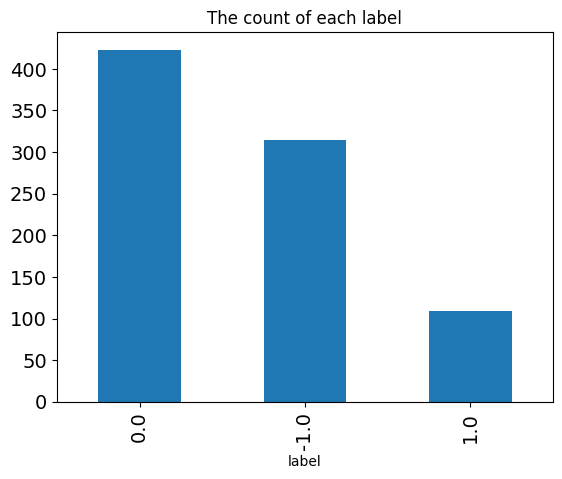

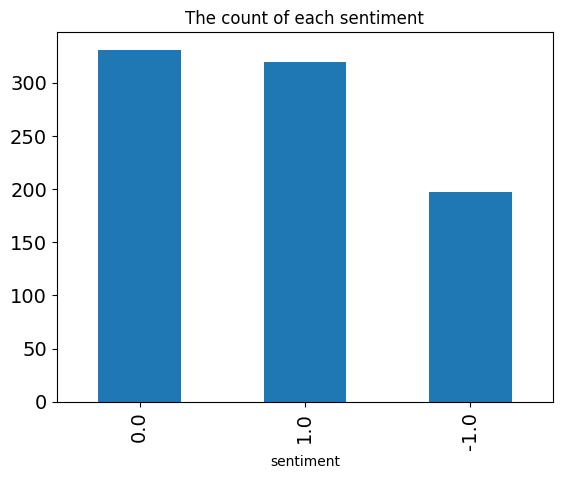

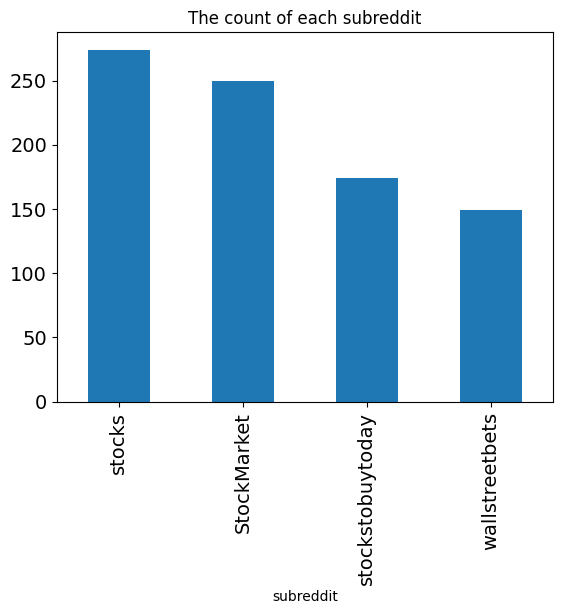

In [115]:
# for unsampled data
print(df["label"].value_counts())
print("="*75)
print(df["sentiment"].value_counts())
print("="*75)
print(df["subreddit"].value_counts())

plt.figure()
df["label"].value_counts().plot(kind="bar", title="The count of each label",fontsize=14)
plt.figure()
df["sentiment"].value_counts().plot(kind="bar", title="The count of each sentiment",fontsize=14)
plt.figure()
df["subreddit"].value_counts().plot(kind="bar", title="The count of each subreddit",fontsize=14)

label
 0.0    237
-1.0    204
 1.0     67
Name: count, dtype: int64
sentiment
 0.0    193
 1.0    193
-1.0    122
Name: count, dtype: int64
subreddit
stocks              172
StockMarket         153
stockstobuytoday    104
wallstreetbets       79
Name: count, dtype: int64


<Axes: title={'center': 'The count of each subreddit'}, xlabel='subreddit'>

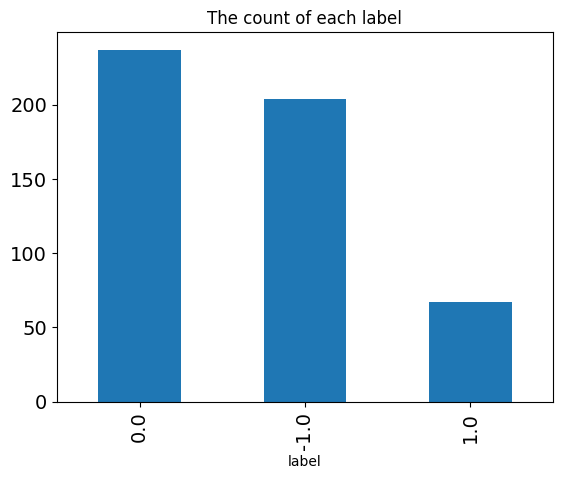

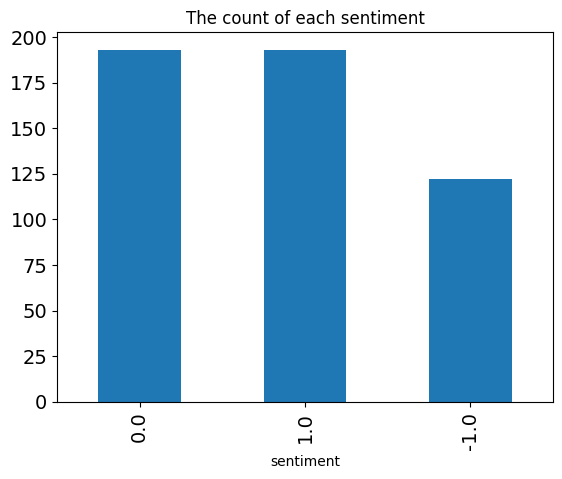

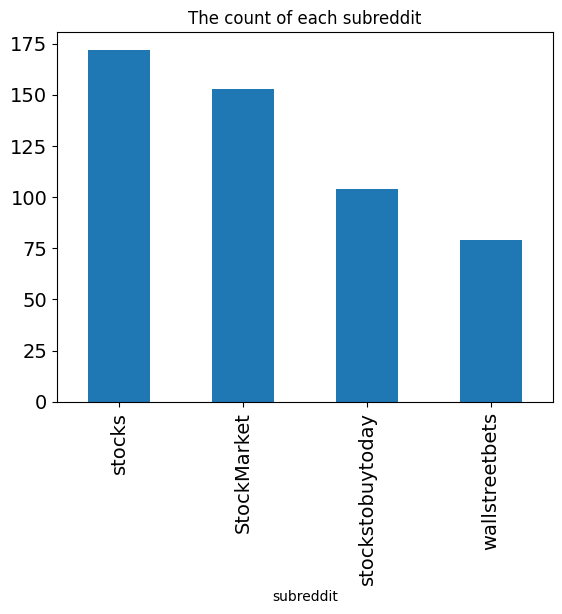

In [ ]:
# for sampled data
print(df_sample["label"].value_counts())
print("="*75)
print(df_sample["sentiment"].value_counts())
print("="*75)
print(df_sample["subreddit"].value_counts())

plt.figure()
df_sample["label"].value_counts().plot(kind="bar", title="The count of each label",fontsize=14)
plt.figure()
df_sample["sentiment"].value_counts().plot(kind="bar", title="The count of each sentiment",fontsize=14)
plt.figure()
df_sample["subreddit"].value_counts().plot(kind="bar", title="The count of each subreddit",fontsize=14)

# By comparing the bar charts of sampled data and unsampled data, we can see that the ditribution of teh data keep the same trend....

_**Exercise-8**_ 

<Axes: title={'center': 'The count of each subreddit'}, xlabel='subreddit'>

<Figure size 640x480 with 0 Axes>

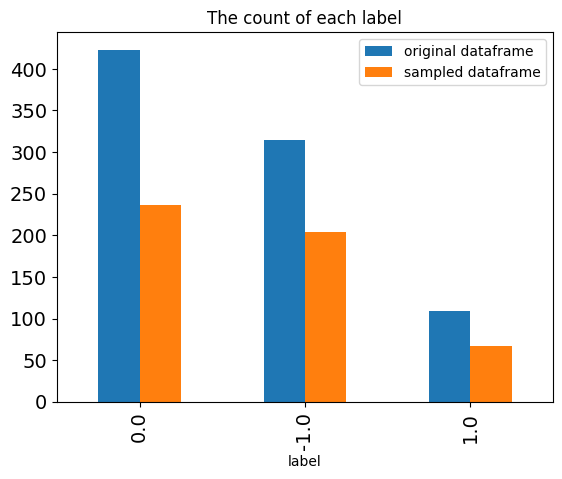

<Figure size 640x480 with 0 Axes>

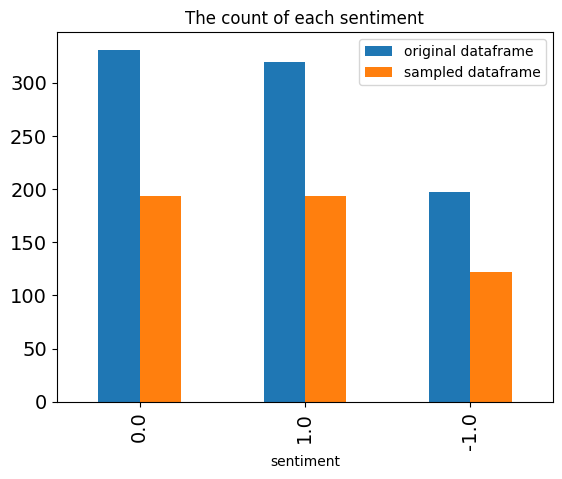

<Figure size 640x480 with 0 Axes>

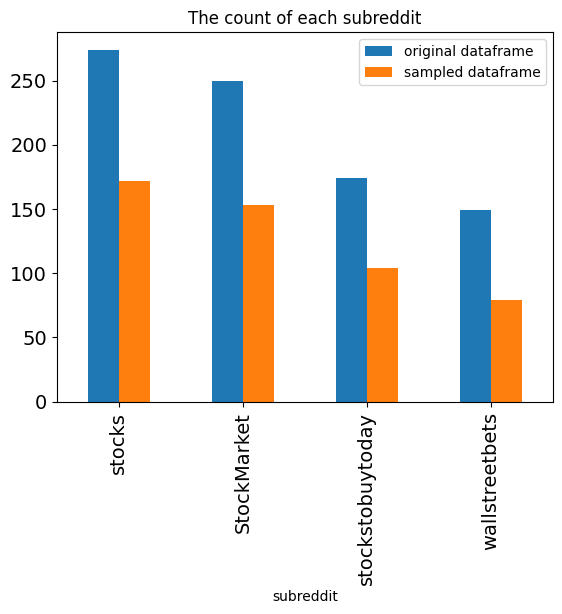

In [ ]:
# we combine the sample and unsample data into one graph for better realization
df_label_cnt = df["label"].value_counts()
df_sample_label_cnt = df_sample["label"].value_counts()
df_senti_cnt = df["sentiment"].value_counts()
df_sample_senti_cnt = df_sample["sentiment"].value_counts()
df_subreddit_cnt = df["subreddit"].value_counts()
df_sample_subreddit_cnt = df_sample["subreddit"].value_counts()

plt.figure()
df_label_draw = pd.DataFrame({"original dataframe":df_label_cnt, "sampled dataframe":df_sample_label_cnt})
df_label_draw.plot(kind="bar", title="The count of each label",fontsize=14)

plt.figure()
df_senti_draw = pd.DataFrame({"original dataframe":df_senti_cnt, "sampled dataframe":df_sample_senti_cnt})
df_senti_draw.plot(kind="bar", title="The count of each sentiment",fontsize=14)

plt.figure()
df_sub_draw = pd.DataFrame({"original dataframe":df_subreddit_cnt, "sampled dataframe":df_sample_subreddit_cnt})
df_sub_draw.plot(kind="bar", title="The count of each subreddit", fontsize=14)

# The conclusion is same as exercise-7....

_**Exercise-9**_

In [130]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

# for tokenizing the text data
df["unigram"] = df["text"].apply(lambda x: dmh.tokenize_text(x))
print(df["unigram"].head())

print("="*75)

print(list(df["unigram"][0:5]))


0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
4                 [He, didn, ’, t, say, thank, you, .]
Name: unigram, dtype: object
[['Calls', 'on', 'retards'], ['Stunt', 'as', 'in', 'like', 'why', 'did', 'they', 'even', 'make', 'a', 'big', 'deal', 'about', 'starting', 'it', 'in', 'the', 'first', 'place', '?', 'No', 'company', 'should', 'ever', 'talk', 'about', 'politics', 'ever', '.'], ['Seeing', 'lots', 'of', 'red', 'in', 'the', 'ticker', '.'], ['Vision', 'Marine', 'Technologies', 'Inc.', 'is', 'rewriting', 'the', 'watercraft', 'rulebook', '.', 'Their', 'collaboration', 'with', 'Shaun', 'Torrente', 'has', 'achieved', 'the', 'unthinkable', '–', 'a', 'blazing', '116', 'mph', 'on', 'water', '!', 'This', 'is', "n't", 'just', 'about', 'speed', ';', 'it', "'s", 'about', 'propelling', 'electric', 'boating', 'into', 'a', '

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [134]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_text_cnt = count_vect.fit_transform(df["text"])
print(df_text_cnt)

# note : (x, y) x is the row number(article idx), and y is the column number(skl.CVr word idx)
print("="*75)
print("Dor checking : ", count_vect.get_feature_names_out()[692], count_vect.get_feature_names_out()[2706], count_vect.get_feature_names_out()[3248], )

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1
  (np.int32(1), np.int32(3696))	1
  (np.int32(1), np.int32(388))	1
  (np.int32(1), np.int32(2024))	2
  (np.int32(1), np.int32(2310))	1
  (np.int32(1), np.int32(4244))	1
  (np.int32(1), np.int32(1168))	1
  (np.int32(1), np.int32(3858))	1
  (np.int32(1), np.int32(1409))	1
  (np.int32(1), np.int32(2402))	1
  (np.int32(1), np.int32(538))	1
  (np.int32(1), np.int32(1083))	1
  (np.int32(1), np.int32(175))	2
  (np.int32(1), np.int32(3628))	1
  (np.int32(1), np.int32(2161))	1
  (np.int32(1), np.int32(3848))	1
  (np.int32(1), np.int32(1568))	1
  (np.int32(1), np.int32(2878))	1
  (np.int32(1), np.int32(2645))	1
  (np.int32(1), np.int32(887))	1
  (np.int32(1), np.int32(3477))	1
  (np.int32(1), np.int32(1412))	2
  (np.int32(1), np.int32(3795))	1
  :	:
  (np.int32(843), np.int32(3866))	1
  (np.int32(843), np.int32(697))	1
  (np.int32(843), np.int32(4229))	1
  (np.int32(843), np.int32(3113))	1
  (np.

In [ ]:
# following is for building analyzer
analyzer = count_vect.build_analyzer()

# The analyzer can break the text into tokens
print(analyzer(df["text"][0]),"\n", analyzer(df["text"][1]))
print("="*75)



['calls', 'on', 'retards'] 
 ['stunt', 'as', 'in', 'like', 'why', 'did', 'they', 'even', 'make', 'big', 'deal', 'about', 'starting', 'it', 'in', 'the', 'first', 'place', 'no', 'company', 'should', 'ever', 'talk', 'about', 'politics', 'ever']


_**Exercise-10**_

In [150]:
# first we check the matrix shape, and show some of the feature names
print("The shape of Text matrix",df_text_cnt.shape)
print(count_vect.get_feature_names_out()[:10])

print("="*75)

# And then we show df in the format of array
df_text_cnt_array = df_text_cnt.toarray()
df_text_cnt_array[0:5][0:10]

The shape of Text matrix (847, 4346)
['00' '000' '01378' '02' '027' '03' '06' '08' '10' '100']


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# we can find the specific 1 in the flattened array
row = df_text_cnt[0].toarray().flatten()

# useing (row == 1) to get the true, false -term array and then use nonzero() to get the indices of the true term
indices = (row == 1).nonzero()[0]
print("The nonzero term is : ", indices)

The nonzero term is :  [ 692 2706 3248]


_**Exercise-11**_

density : 0.00467


<Axes: >

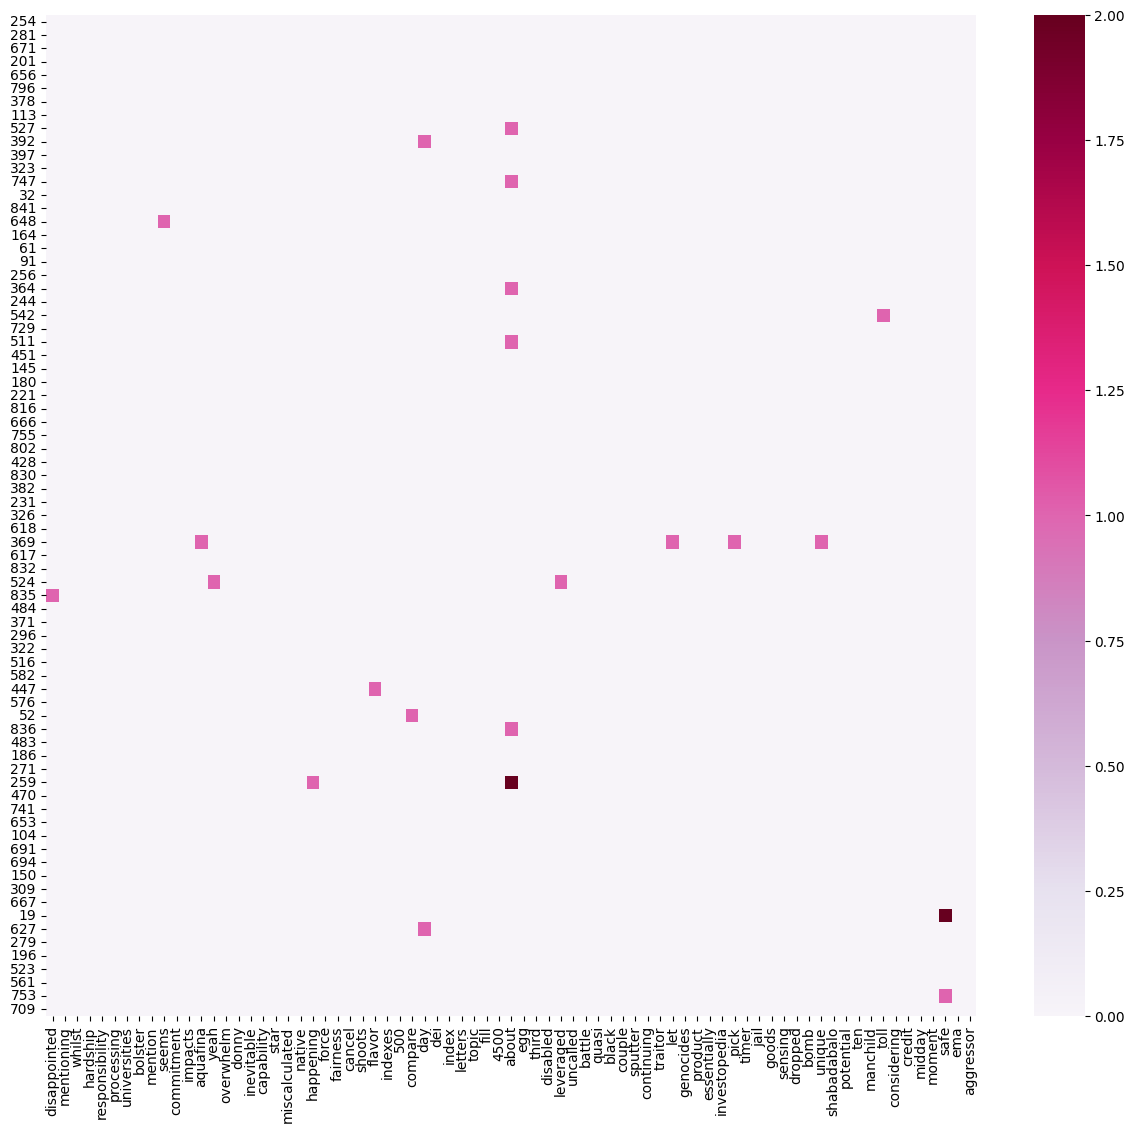

In [161]:
# To visiualize the array is sparse matrix...
import seaborn as sns

df_rd_size = 75

density = (df_text_cnt.nnz / (df_text_cnt.shape[0] * df_text_cnt.shape[1]))
print(f"density : {density:.5f}")

samp_text = np.random.choice(df_text_cnt.shape[0], size=df_rd_size, replace=False)
samp_idx = np.random.choice(df_text_cnt.shape[1], size=df_rd_size, replace=False)
sub = df_text_cnt[samp_text, :][:, samp_idx].toarray()
# note: [size, :] -> 表示抽取指定的row, column全部取
#       [:, size] -> 表示抽取指定的column, row全部取

# preparing tags
x_labels = [count_vect.get_feature_names_out()[i] for i in samp_idx]
y_labels = [i for i in samp_text]

# ploting the heatmap
plt.figure(figsize=(15,13))
sns.heatmap(sub, xticklabels=x_labels, yticklabels=y_labels, cmap="PuRd",cbar=True)

_**Exercise-12**_

In [ ]:
# Now, we want to know the term frequency in the whole text data
term_freq = np.asarray(df_text_cnt.sum(axis=0))[0]
# quickly check the term frequency of the first 10 terms
print(term_freq[:10])

[ 4  6  1  1  1  1  1  1 21 11]


In [ ]:
import plotly.express as px

df_draw = pd.DataFrame({"term":count_vect.get_feature_names_out()[:500], 
                        "term_freq":term_freq[:500]})
plt.figure(figsize=(20,8))
fig = px.bar(df_draw, x="term", y="term_freq", title="The term frequency of the first 500 terms", color="term_freq")
fig.show()

<Figure size 2000x800 with 0 Axes>

_**Exercise-13**_

In [183]:
# Same as Exeercise-12, we show the term frequency of the first 500 terms in a bar chart but smaller size

df_draw = pd.DataFrame({"term":count_vect.get_feature_names_out()[:100], 
                        "term_freq":term_freq[:100]})
plt.figure(figsize=(20,8))
fig = px.bar(df_draw, x="term", y="term_freq", title="The term frequency of the first 500 terms", color="term_freq")
fig.show()

<Figure size 2000x800 with 0 Axes>

_**Exercise-14**_

In [181]:
# we show long-tail distribution of the term frequency

top_n = 75
df_top = df_draw.sort_values(by="term_freq", ascending=False)[:top_n]
plt.figure(figsize=(20,8))
fig = px.bar(df_top, x="term", y="term_freq", title=f"The top {top_n} term frequency")
fig.show()

<Figure size 2000x800 with 0 Axes>

_**Exercsie-15**_

In [184]:
# Using log term to reduce the skewness of the distribution
import math
text_freq_log = [math.log(x+1) for x in term_freq]

df_draw_log = pd.DataFrame({"term":count_vect.get_feature_names_out()[:500], 
                            "term_freq_log":text_freq_log[:500]})

top_n = 75
df_top_log = df_draw_log.sort_values(by="term_freq_log", ascending=False)[:top_n]
plt.figure(figsize=(20,8))
fig = px.bar(df_top_log, x="term", y="term_freq_log", title=f"The top {top_n} term frequency")
fig.show()

<Figure size 2000x800 with 0 Axes>

_**Extra_Visualization**_

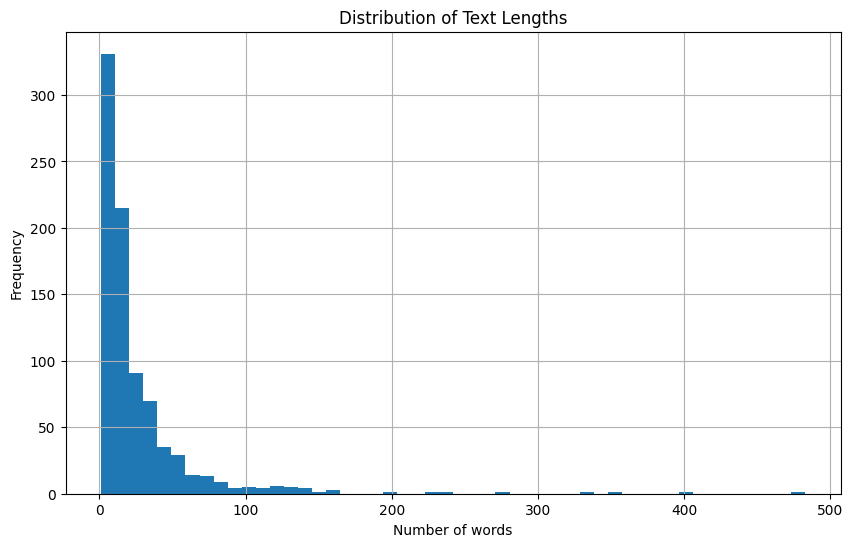

<Figure size 1000x600 with 0 Axes>

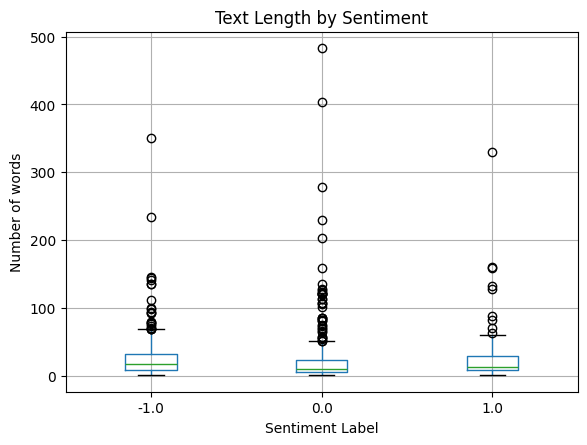

In [ ]:
import matplotlib.pyplot as plt

# we want to find out the relationship between text length and sentiment

# cal the length of each text
df["text_len"] = df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,6))
df["text_len"].hist(bins=50)
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

# accordingt to sentiment
plt.figure(figsize=(10,6))
df.boxplot(column="text_len", by="label")
plt.title("Text Length by Sentiment")
plt.suptitle("")  # remove redundant title
plt.xlabel("Sentiment Label")
plt.ylabel("Number of words")
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here